Importing the dependencies

In [28]:
import numpy as np
import pandas as pd
import difflib
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

Hypothesis 1: Strong correlation between Budget and popularity?

Hypothesis 2: Between director and cast, who has the stronger correlation to revenue


Data Collection and Pre-Processing

In [5]:
# loading the data from the csv file to apandas dataframe
movies_data = pd.read_csv('../Downloads/movies.csv')

In [6]:
# printing the first 5 rows of the dataframe
movies_data.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [39]:
# number of rows and columns in the data frame

movies_data.shape

(1712, 24)

In [40]:
movies_data.isnull().sum()
cleaned_data= movies_data.dropna()
cleaned_data.isnull().sum()

index                   0
budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
cast                    0
crew                    0
director                0
dtype: int64

In [42]:
cleaned_data= cleaned_data.drop_duplicates()

cleaned_data.shape

(1712, 24)

In [44]:
cleaned_data.sort_values(by=['budget'], inplace=True, ascending=False)

cleaned_data.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
17,17,380000000,Adventure Action Fantasy,http://disney.go.com/pirates/index-on-stranger...,1865,sea captain mutiny sword prime minister,en,Pirates of the Caribbean: On Stranger Tides,Captain Jack Sparrow crosses paths with a woma...,135.413856,...,136.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Live Forever Or Die Trying.,Pirates of the Caribbean: On Stranger Tides,6.4,4948,Johnny Depp Pen\u00e9lope Cruz Ian McShane Kev...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Rob Marshall
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
7,7,280000000,Action Adventure Science Fiction,http://marvel.com/movies/movie/193/avengers_ag...,99861,marvel comic sequel superhero based on comic b...,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,...,141.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767,Robert Downey Jr. Chris Hemsworth Mark Ruffalo...,"[{'name': 'Danny Elfman', 'gender': 2, 'depart...",Joss Whedon
10,10,270000000,Adventure Fantasy Action Science Fiction,http://www.superman.com,1452,saving the world dc comics invulnerability seq...,en,Superman Returns,Superman returns to discover his 5-year absenc...,57.925623,...,154.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,,Superman Returns,5.4,1400,Brandon Routh Kevin Spacey Kate Bosworth James...,"[{'name': 'Roger Mussenden', 'gender': 2, 'dep...",Bryan Singer
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


<Axes: xlabel='budget', ylabel='revenue'>

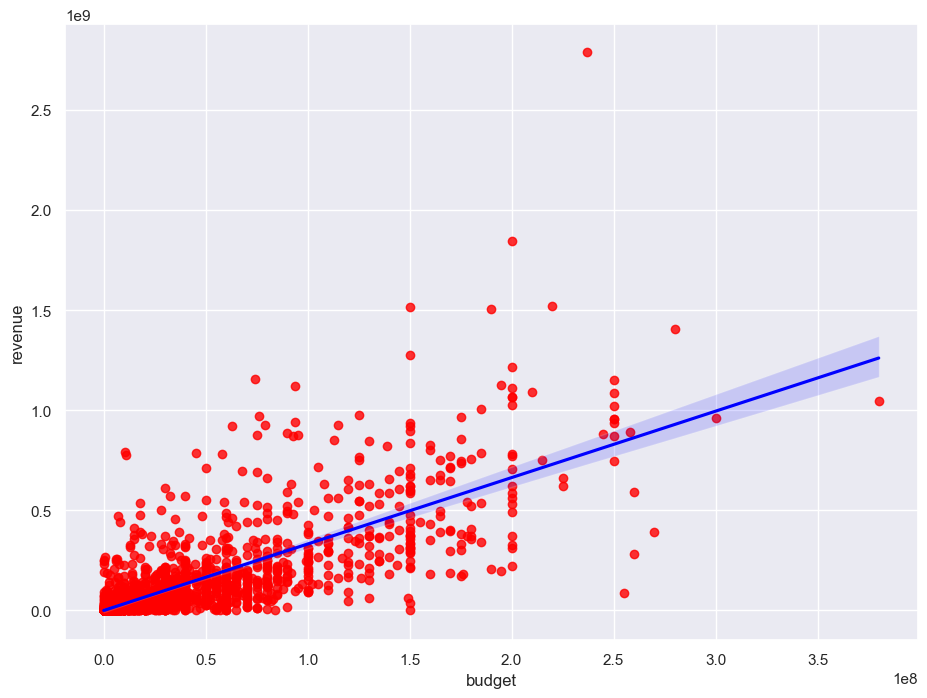

In [47]:
sns.set(rc={'figure.figsize':(11,8)})
sns.regplot(x="budget", y="revenue", data=cleaned_data, line_kws= {"color": "blue"}, scatter_kws= {"color": "red"})

In [46]:
cleaned_data.corr() #0.753507 between budget and revenue

/var/folders/74/172sg4ws24b6p0wqzc74f0n80000gn/T/ipykernel_28710/216147501.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cleaned_data.corr()


,index,budget,id,popularity,revenue,runtime,vote_average,vote_count
index,1.000000,-0.776388,0.125603,-0.414063,-0.564491,-0.372697,-0.101501,-0.496715
budget,-0.776388,1.000000,-0.060290,0.477972,0.753507,0.354060,0.093368,0.617014
id,0.125603,-0.060290,1.000000,0.075708,-0.045002,-0.092404,-0.190743,-0.002379
popularity,-0.414063,0.477972,0.075708,1.000000,0.610483,0.283734,0.280222,0.732044
revenue,-0.564491,0.753507,-0.045002,0.610483,1.000000,0.357147,0.229621,0.791279
runtime,-0.372697,0.354060,-0.092404,0.283734,0.357147,1.000000,0.366833,0.407882
vote_average,-0.101501,0.093368,-0.190743,0.280222,0.229621,0.366833,1.000000,0.380286
vote_count,-0.496715,0.617014,-0.002379,0.732044,0.791279,0.407882,0.380286,1.000000


/var/folders/74/172sg4ws24b6p0wqzc74f0n80000gn/T/ipykernel_28710/37679469.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix= cleaned_data.corr()


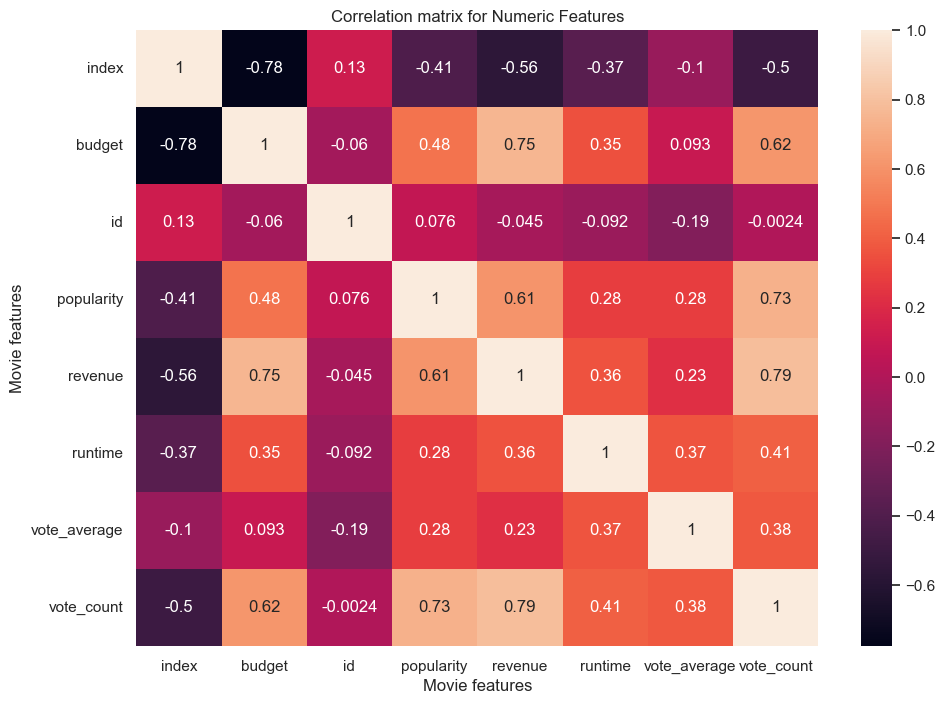

In [48]:
correlation_matrix= cleaned_data.corr()
sns.heatmap(correlation_matrix, annot= True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

Converting non numerized columns into numerized to add to correlation matrix


In [50]:
df_numerized = cleaned_data


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.corr()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
index,1.000000,-0.776388,0.253166,0.000023,0.125603,-0.050921,0.059534,-0.034818,-0.073973,-0.414063,...,-0.372697,0.006279,-0.004643,-0.210212,-0.029270,-0.101501,-0.496715,0.011467,0.022313,-0.023160
budget,-0.776388,1.000000,-0.272773,-0.014166,-0.060290,0.037917,-0.066565,0.032252,0.074895,0.477972,...,0.354060,0.002474,0.010621,0.161586,0.030498,0.093368,0.617014,0.001970,-0.042506,-0.010103
genres,0.253166,-0.272773,1.000000,0.000538,0.071428,0.014702,0.025199,0.018269,-0.063633,-0.109971,...,-0.045686,0.018079,-0.015093,-0.057536,0.017637,0.022791,-0.165605,-0.013527,0.019567,0.007876
homepage,0.000023,-0.014166,0.000538,1.000000,-0.036897,0.006438,-0.047792,0.346123,0.005439,-0.053124,...,0.015977,-0.068722,-0.039458,-0.000561,0.354377,0.001548,-0.055806,0.042062,0.007384,-0.024593
id,0.125603,-0.060290,0.071428,-0.036897,1.000000,-0.075759,-0.008806,0.009047,-0.020314,0.075708,...,-0.092404,0.125824,-0.041239,-0.037347,0.012624,-0.190743,-0.002379,-0.035934,-0.010920,-0.055303
keywords,-0.050921,0.037917,0.014702,0.006438,-0.075759,1.000000,0.007729,0.039064,0.050785,0.029292,...,0.024443,-0.028456,0.033053,0.036106,0.027538,0.070018,0.031282,-0.036424,-0.009596,-0.029545
original_language,0.059534,-0.066565,0.025199,-0.047792,-0.008806,0.007729,1.000000,0.082349,-0.040250,-0.058649,...,0.096149,0.088930,0.026900,-0.045815,-0.006174,0.054241,-0.072518,-0.010754,0.036613,0.012518
original_title,-0.034818,0.032252,0.018269,0.346123,0.009047,0.039064,0.082349,1.000000,0.020166,-0.006358,...,0.046760,0.040079,0.037654,-0.004244,0.945073,-0.001205,0.017951,-0.044655,0.010002,-0.032265
overview,-0.073973,0.074895,-0.063633,0.005439,-0.020314,0.050785,-0.040250,0.020166,1.000000,0.044675,...,0.014833,-0.026305,0.021502,0.030682,0.021506,0.012549,0.051826,0.014210,-0.004928,-0.028220
popularity,-0.414063,0.477972,-0.109971,-0.053124,0.075708,0.029292,-0.058649,-0.006358,0.044675,1.000000,...,0.283734,0.038221,0.009305,0.118897,-0.007155,0.280222,0.732044,0.009589,-0.034297,-0.035213


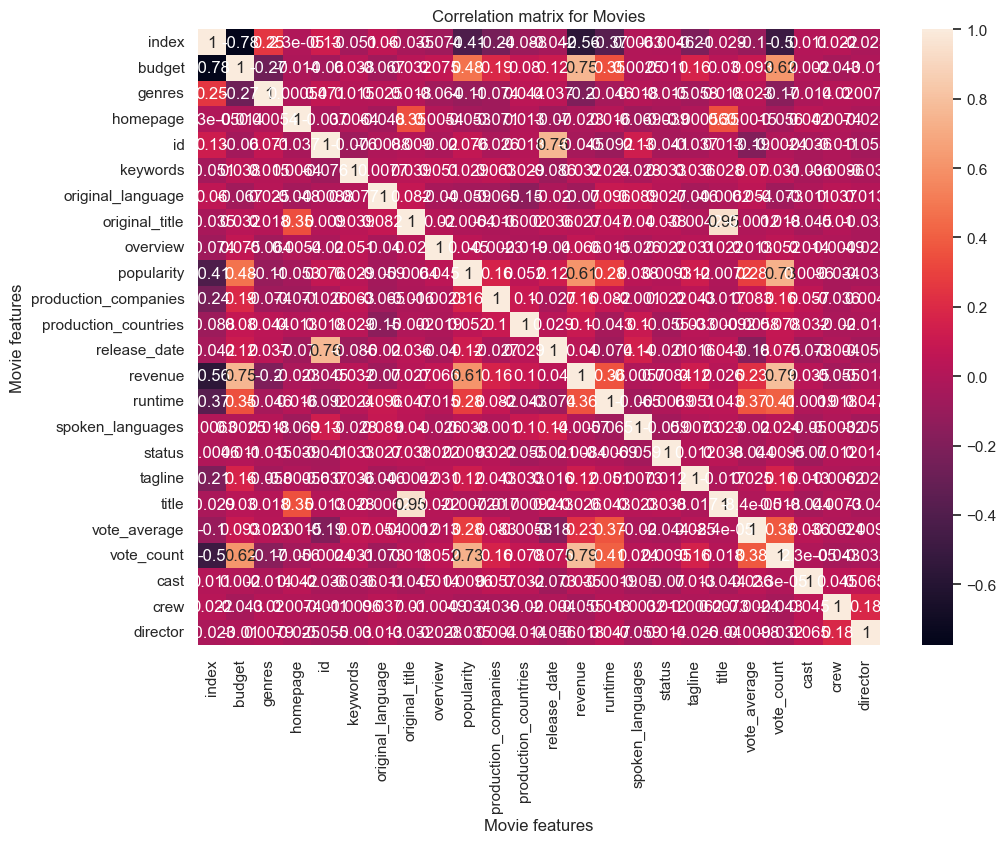

In [51]:
correlation_matrix= df_numerized.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [52]:
corr_pairs = correlation_matrix.unstack()

print(corr_pairs)

index     index           1.000000
          budget         -0.776388
          genres          0.253166
          homepage        0.000023
          id              0.125603
                            ...   
director  vote_average   -0.009846
          vote_count     -0.032273
          cast            0.065192
          crew            0.182806
          director        1.000000
Length: 576, dtype: float64


In [53]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

index                 budget                 -0.776388
budget                index                  -0.776388
index                 revenue                -0.564491
revenue               index                  -0.564491
index                 vote_count             -0.496715
                                                ...   
title                 title                   1.000000
vote_average          vote_average            1.000000
vote_count            vote_count              1.000000
production_countries  production_countries    1.000000
director              director                1.000000
Length: 576, dtype: float64


In [54]:
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.4]
pd.set_option("display.max_rows", None, "display.max_columns", None)

display(strong_pairs)

index                 budget                 -0.776388
budget                index                  -0.776388
index                 revenue                -0.564491
revenue               index                  -0.564491
index                 vote_count             -0.496715
vote_count            index                  -0.496715
popularity            index                  -0.414063
index                 popularity             -0.414063
runtime               vote_count              0.407882
vote_count            runtime                 0.407882
popularity            budget                  0.477972
budget                popularity              0.477972
revenue               popularity              0.610483
popularity            revenue                 0.610483
budget                vote_count              0.617014
vote_count            budget                  0.617014
popularity            vote_count              0.732044
vote_count            popularity              0.732044
revenue   

Conclusion: weak correlation for both cast and revenue and director and revenue

# Recommendation System

In [8]:
# selecting the relevant features for recommendation

selected_features = ['genres','keywords','tagline','cast','director']
print(selected_features)

['genres', 'keywords', 'tagline', 'cast', 'director']


In [9]:
# replacing the null valuess with null string

for feature in selected_features:
  movies_data[feature] = movies_data[feature].fillna('')

In [10]:
# combining all the 5 selected features

combined_features = movies_data['genres']+' '+movies_data['keywords']+' '+movies_data['tagline']+' '+movies_data['cast']+' '+movies_data['director']

In [11]:
print(combined_features)

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      A New Yorker in Shanghai Daniel Henney Eliza...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object


In [12]:
# converting the text data to feature vectors

vectorizer = TfidfVectorizer()

In [13]:
feature_vectors = vectorizer.fit_transform(combined_features)

In [14]:
print(feature_vectors)

  (0, 2432)	0.17272411194153
  (0, 7755)	0.11280357148547558
  (0, 13024)	0.19423620601088706
  (0, 10229)	0.160586854000953
  (0, 8756)	0.22709015857011813
  (0, 14608)	0.15150672398763912
  (0, 16668)	0.1984326396510037
  (0, 14064)	0.2059609041508414
  (0, 13319)	0.21774705394124838
  (0, 17290)	0.20197912553916564
  (0, 17007)	0.23643326319898794
  (0, 13349)	0.15021264094167083
  (0, 11503)	0.2721131005698365
  (0, 11192)	0.09049319826481456
  (0, 16998)	0.12821263228505786
  (0, 15261)	0.07095833561276564
  (0, 4945)	0.24025852494110755
  (0, 14271)	0.21392179219912874
  (0, 3225)	0.24960162956997733
  (0, 16587)	0.12549432354918996
  (0, 14378)	0.3396275221095982
  (0, 5836)	0.1646750903586285
  (0, 3065)	0.22208377802661422
  (0, 3678)	0.21392179219912874
  (0, 5437)	0.10364139873166359
  :	:
  (4801, 17266)	0.2886098184932947
  (4801, 4835)	0.24713765026963996
  (4801, 403)	0.17727585190343226
  (4801, 6935)	0.2886098184932947
  (4801, 11663)	0.21557500762727902
  (4801, 1672)

Cosine Similarity

In [15]:
# getting the similarity scores using cosine similarity

similarity = cosine_similarity(feature_vectors)

In [16]:
print(similarity)

[[1.         0.07219487 0.037733   ... 0.         0.         0.        ]
 [0.07219487 1.         0.03281499 ... 0.03575545 0.         0.        ]
 [0.037733   0.03281499 1.         ... 0.         0.05389661 0.        ]
 ...
 [0.         0.03575545 0.         ... 1.         0.         0.02651502]
 [0.         0.         0.05389661 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.02651502 0.         1.        ]]


In [17]:
print(similarity.shape)

(4803, 4803)


Getting the movie name from the user

In [18]:
# getting the movie name from the user

movie_name = input(' Enter your favourite movie name : ')

 Enter your favourite movie name : avatar


In [19]:
# creating a list with all the movie names given in the dataset

list_of_all_titles = movies_data['title'].tolist()
print(list_of_all_titles)

['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

In [20]:
# finding the close match for the movie name given by the user

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)
print(find_close_match)

['Avatar']


In [21]:
close_match = find_close_match[0]
print(close_match)

Avatar


In [22]:
# finding the index of the movie with title

index_of_the_movie = movies_data[movies_data.title == close_match]['index'].values[0]
print(index_of_the_movie)

0


In [23]:
# getting a list of similar movies

similarity_score = list(enumerate(similarity[index_of_the_movie]))
print(similarity_score)

[(0, 1.0000000000000002), (1, 0.07219486822992491), (2, 0.03773299957717928), (3, 0.012520204623868908), (4, 0.10702574467235304), (5, 0.07786899789424222), (6, 0.008237143013608844), (7, 0.03613473061484884), (8, 0.02960930964063025), (9, 0.02628716743995174), (10, 0.09261074046755373), (11, 0.012717759249124133), (12, 0.027217360083100117), (13, 0.02956975252334751), (14, 0.06915925473724742), (15, 0.01955159449930903), (16, 0.034263405780616416), (17, 0.02603656461429414), (18, 0.05714759266672413), (19, 0.0389505953521203), (20, 0.03971480215415496), (21, 0.01201480380565613), (22, 0.030438694261989592), (23, 0.045926535588179496), (24, 0.0462398901796526), (25, 0.04284926095950226), (26, 0.07010711150614288), (27, 0.037198076232328854), (28, 0.04083909796927843), (29, 0.03858648330156397), (30, 0.07893753610792024), (31, 0.060555221380551486), (32, 0.030362745635800832), (33, 0.03591021470068869), (34, 0.0), (35, 0.03769674103474844), (36, 0.048910879509114234), (37, 0.08575173998

In [24]:
len(similarity_score)

4803

In [25]:
# sorting the movies based on their similarity score

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True)
print(sorted_similar_movies)

[(0, 1.0000000000000002), (3158, 0.24946766307532411), (2403, 0.24841462595906275), (94, 0.24505931974059814), (56, 0.20378069648285432), (47, 0.20115287461144912), (1053, 0.19702752258651426), (838, 0.18017023369312357), (3730, 0.17646241185313413), (4593, 0.17448845797415174), (239, 0.17441748680810654), (1531, 0.1682605817219649), (2696, 0.16503460259176522), (812, 0.1606230190749179), (643, 0.15644455512484967), (4401, 0.15468923545220403), (2198, 0.1521716197189379), (770, 0.1502572672775349), (1951, 0.14933372705282924), (2229, 0.14661801285492257), (1922, 0.1448197430191312), (206, 0.14226144606175545), (3208, 0.1401230206493547), (1759, 0.13899056016968867), (43, 0.1348209130228474), (1473, 0.13476547670086914), (278, 0.13291021545504), (158, 0.13252892131627672), (1650, 0.13024318650645417), (1275, 0.12602216304791153), (3439, 0.12480340331169383), (661, 0.12153002734138185), (3202, 0.12144749322246054), (4332, 0.12002556168548507), (3105, 0.11948466494212534), (775, 0.1184706

In [26]:
# print the name of similar movies based on the index

print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = movies_data[movies_data.index==index]['title'].values[0]
  if (i<30):
    print(i, '.',title_from_index)
    i+=1

Movies suggested for you : 

1 . Avatar
2 . Alien
3 . Aliens
4 . Guardians of the Galaxy
5 . Star Trek Beyond
6 . Star Trek Into Darkness
7 . Galaxy Quest
8 . Alien³
9 . Cargo
10 . Trekkies
11 . Gravity
12 . Moonraker
13 . Jason X
14 . Pocahontas
15 . Space Cowboys
16 . The Helix... Loaded
17 . Lockout
18 . Event Horizon
19 . Space Dogs
20 . Machete Kills
21 . Gettysburg
22 . Clash of the Titans
23 . Star Wars: Clone Wars: Volume 1
24 . The Right Stuff
25 . Terminator Salvation
26 . The Astronaut's Wife
27 . Planet of the Apes
28 . Star Trek
29 . Wing Commander


Movie Recommendation Sytem

In [27]:
movie_name = input(' Enter your favourite movie name : ')

list_of_all_titles = movies_data['title'].tolist()

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)

close_match = find_close_match[0]

index_of_the_movie = movies_data[movies_data.title == close_match]['index'].values[0]

similarity_score = list(enumerate(similarity[index_of_the_movie]))

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True)

print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = movies_data[movies_data.index==index]['title'].values[0]
  if (i<30):
    print(i, '.',title_from_index)
    i+=1

 Enter your favourite movie name : Star Wars
Movies suggested for you : 

1 . Star Wars
2 . The Empire Strikes Back
3 . Return of the Jedi
4 . On Her Majesty's Secret Service
5 . Titan A.E.
6 . Star Wars: Episode I - The Phantom Menace
7 . The Helix... Loaded
8 . Star Wars: Episode III - Revenge of the Sith
9 . Timecop
10 . Lawrence of Arabia
11 . Random Hearts
12 . Blade Runner
13 . Ultramarines: A Warhammer 40,000 Movie
14 . Star Wars: Episode II - Attack of the Clones
15 . Lilo & Stitch
16 . The Time Machine
17 . Fetching Cody
18 . When Harry Met Sally...
19 . Back to the Future Part III
20 . Laws of Attraction
21 . Raise the Titanic
22 . Bill & Ted's Bogus Journey
23 . Hollywood Homicide
24 . The Departed
25 . Raiders of the Lost Ark
26 . Ender's Game
27 . Premonition
28 . An Inconvenient Truth
29 . The Fugitive
